In [58]:
# model pretrained for https://sites.google.com/view/totally-looks-like-dataset

import numpy as np
import pickle

import torch,os
from glob import glob
import torch.nn as nn
from torchvision import models
from torchvision import transforms

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)

preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])
network = models.densenet121

def getNetwork():   
    model = network(pretrained=True)
    return nn.Sequential(model.features,nn.AvgPool2d(7,stride=1))

In [59]:
model = getNetwork()

In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

In [61]:
test_image = PIL.Image.open('data/pinterest/images/00a027ae2dd28fa6658a41e9c700d17e.jpg')

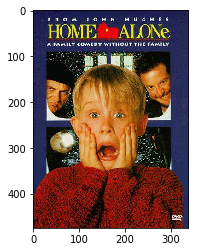

In [62]:
plt.imshow(test_image)

In [63]:
print(model)

Sequential(
  (0): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): R

In [64]:
res = preprocess(test_image).unsqueeze(0)

In [65]:
res.shape

torch.Size([1, 3, 224, 224])

In [66]:
torch.min(res), torch.max(res)

(tensor(-2.1179), tensor(2.4134))

In [67]:
emb = model(res)

In [68]:
import os

(380, 304, 3)


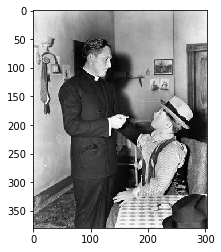

In [70]:
fixed = cv2.cvtColor(np.array(PIL.Image.open('data/pinterest/images/61e49607b099825edd4dec7e67852995.jpg')),cv2.COLOR_GRAY2RGB)
plt.imshow(fixed)
print(fixed.shape)

In [587]:
import tqdm

embeds = []

img_in_dir = '/Users/sergmiller/Downloads/images 3'
img_out_dir = 'data/movies/images/'

model.eval()

for movie in tqdm.tqdm(os.listdir(img_in_dir), position=0):
    movie_dir = os.path.join(img_in_dir, movie)
    if not os.path.isdir(movie_dir) or movie == '.DS_Store':
        continue
    for f in os.listdir(movie_dir):
        if f[-4:] != '.jpg':
            continue
        fixed_name = movie + '$' + f
        image = PIL.Image.open(os.path.join(movie_dir,f))
        image.save(os.path.join(img_out_dir, fixed_name))
        image_arr = np.array(image)
        if image_arr.shape[-1] != 3:
            image = PIL.Image.fromarray(cv2.cvtColor(image_arr,cv2.COLOR_GRAY2RGB))
        prepared = preprocess(image).unsqueeze(0)
        e = model(prepared).squeeze()
        embeds.append([f, np.array(e.detach())])

100%|██████████| 71/71 [12:52<00:00, 10.88s/it]


In [590]:
embeds2 = []

i = 0
for movie in tqdm.tqdm(os.listdir(img_in_dir), position=0):
    movie_dir = os.path.join(img_in_dir, movie)
    if not os.path.isdir(movie_dir) or movie == '.DS_Store':
        continue
    for f in os.listdir(movie_dir):
        if f[-4:] != '.jpg':
            continue
        fixed_name = movie + '$' + f
        embeds2.append([fixed_name, embeds[i][1]])
        i += 1

100%|██████████| 71/71 [00:00<00:00, 889.46it/s]


In [591]:
embeds2[:5]

[['the-iguana-with-the-tongue-of-fire$The_Iguana_with_the_Tongue_of_Fire_012.jpg',
  array([ 1.00239464e-04, -7.10652862e-03,  3.09880445e-04, ...,
         -1.36433697e+00, -4.52817768e-01, -1.19299352e+00], dtype=float32)],
 ['the-iguana-with-the-tongue-of-fire$The_Iguana_with_the_Tongue_of_Fire_006.jpg',
  array([ 2.6375952e-04,  3.1246373e-03,  2.3815867e-03, ...,
         -5.6875449e-01,  1.3454478e+00,  2.9851300e-01], dtype=float32)],
 ['the-iguana-with-the-tongue-of-fire$The_Iguana_with_the_Tongue_of_Fire_007.jpg',
  array([ 2.9727872e-04,  2.5672168e-03,  6.3816708e-04, ...,
         -2.6042686e+00,  9.3667072e-01,  1.3338379e+00], dtype=float32)],
 ['the-iguana-with-the-tongue-of-fire$The_Iguana_with_the_Tongue_of_Fire_013.jpg',
  array([ 3.7244195e-06,  5.2316516e-04, -1.4267311e-03, ...,
          4.9941906e-01,  7.3908085e-01,  8.5761333e-01], dtype=float32)],
 ['the-iguana-with-the-tongue-of-fire$The_Iguana_with_the_Tongue_of_Fire_039.jpg',
  array([ 6.2505633e-04, -1.151

In [592]:
np.save('data/movies/embeds.npy', embeds2)

In [589]:
embeds[:5]

[['The_Iguana_with_the_Tongue_of_Fire_012.jpg',
  array([ 1.00239464e-04, -7.10652862e-03,  3.09880445e-04, ...,
         -1.36433697e+00, -4.52817768e-01, -1.19299352e+00], dtype=float32)],
 ['The_Iguana_with_the_Tongue_of_Fire_006.jpg',
  array([ 2.6375952e-04,  3.1246373e-03,  2.3815867e-03, ...,
         -5.6875449e-01,  1.3454478e+00,  2.9851300e-01], dtype=float32)],
 ['The_Iguana_with_the_Tongue_of_Fire_007.jpg',
  array([ 2.9727872e-04,  2.5672168e-03,  6.3816708e-04, ...,
         -2.6042686e+00,  9.3667072e-01,  1.3338379e+00], dtype=float32)],
 ['The_Iguana_with_the_Tongue_of_Fire_013.jpg',
  array([ 3.7244195e-06,  5.2316516e-04, -1.4267311e-03, ...,
          4.9941906e-01,  7.3908085e-01,  8.5761333e-01], dtype=float32)],
 ['The_Iguana_with_the_Tongue_of_Fire_039.jpg',
  array([ 6.2505633e-04, -1.1510718e-04,  2.2211464e-03, ...,
         -3.0675250e-01,  1.1603770e+00, -8.2215238e-01], dtype=float32)]]

In [197]:
def calc_embed(f):
    image = PIL.Image.open(f)
    image_arr = np.array(image)
    if image_arr.shape[-1] != 3:
        image = PIL.Image.fromarray(cv2.cvtColor(image_arr,cv2.COLOR_GRAY2RGB))
    prepared = preprocess(image).unsqueeze(0)
    e = model(prepared).squeeze()
    return np.array(e.detach())

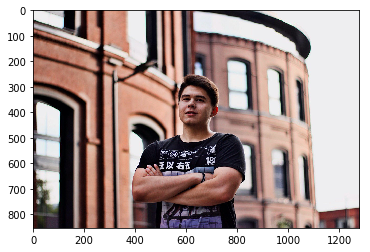

In [247]:
test1 = '2020-02-15 16.56.22.jpg'
plt.imshow(PIL.Image.open(test1))

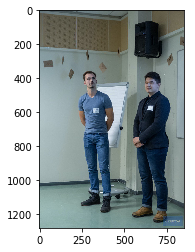

In [132]:
test2 = '2020-02-15 17.10.21.jpg'
plt.imshow(PIL.Image.open(test2))

In [110]:
test_img_emb = find_near(test1)

In [111]:
np.sum(test_img_emb ** 2)

589.9918

In [241]:
os.path.join('data')

True

In [214]:
from scipy.spatial.distance import cosine

def get_near(f, embeds, top=1):
    assert isinstance(embeds, dict)
    e = calc_embed(f)
    diffs = {}

    for k in embeds.keys():
        diffs[k] = cosine(embeds[k],e)
    l = list([(k,diffs[k]) for k in diffs])
    l.sort(key=lambda x:x[1])
    return l[:top]

In [199]:
embeds_pinterest = {k:v for k,v in np.load('data/pinterest/embeds.npy', allow_pickle=True)}
embeds_memes = {k:v for k,v in np.load('data/memes/embeds.npy', allow_pickle=True)}

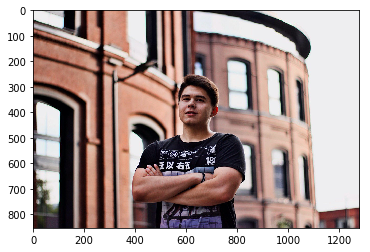

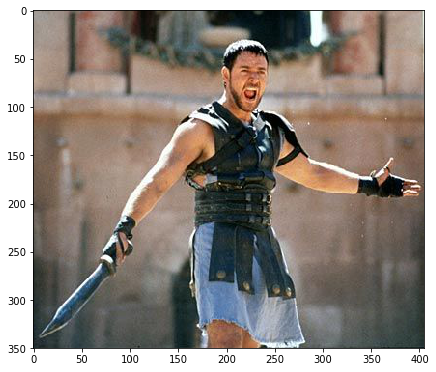

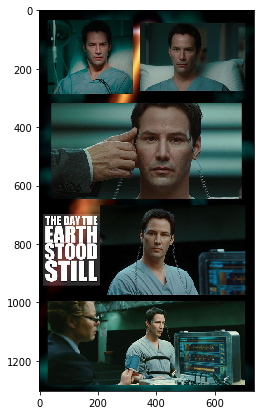

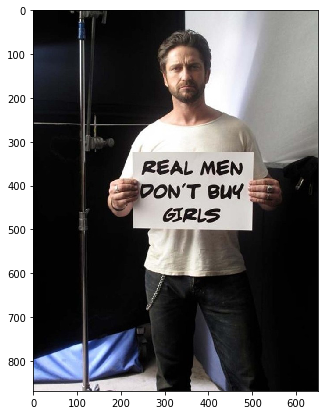

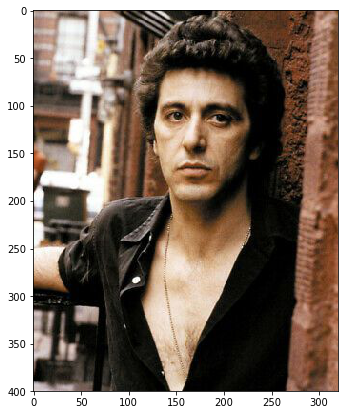

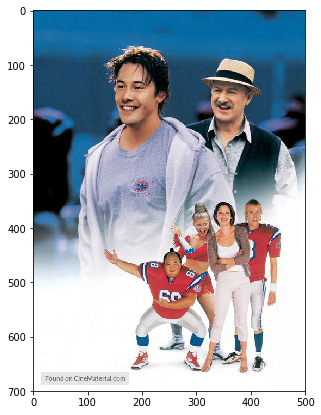

In [263]:
plt.imshow(PIL.Image.open(test1))

for x in get_near(test1, embeds_pinterest, 5):
#     print(x)
    plt.figure(figsize=(7,7))
    plt.imshow(PIL.Image.open('data/pinterest/images/{}'.format(x[0])))
    plt.show()

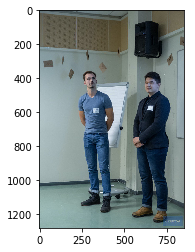

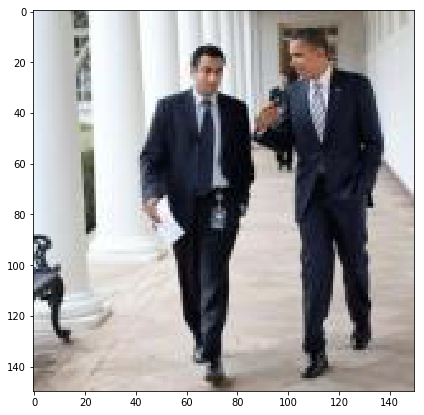

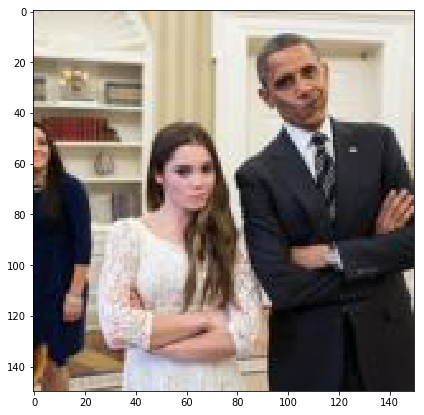

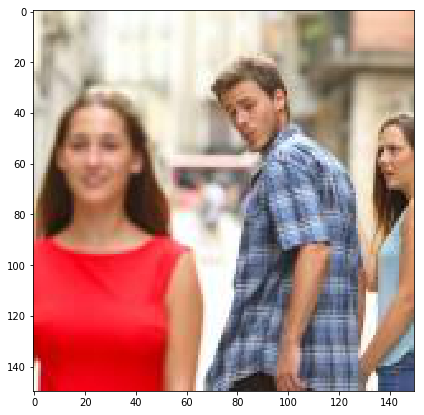

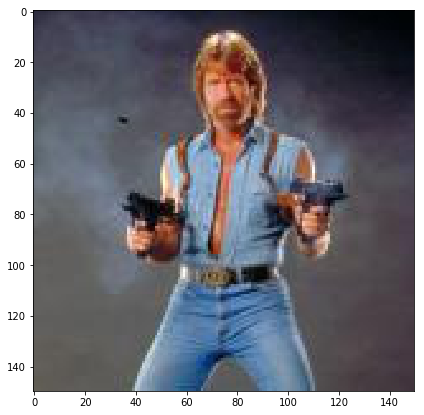

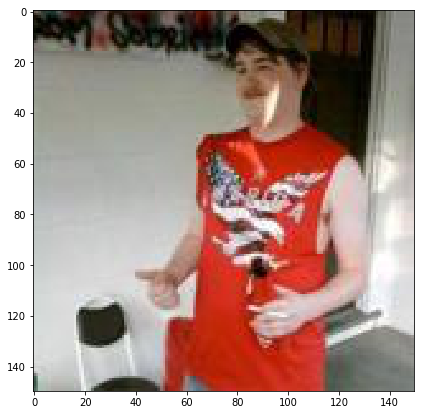

In [216]:
plt.imshow(PIL.Image.open(test2))

for x in get_near(test2, embeds_memes, 5):
    plt.figure(figsize=(7,7))
    plt.imshow(PIL.Image.open('data/memes/images/{}'.format(x[0])))
    plt.show()

In [206]:
test3 = '2020-02-15 18.10.19.jpg'

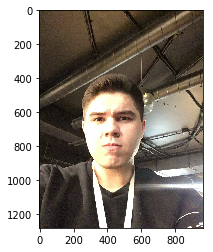

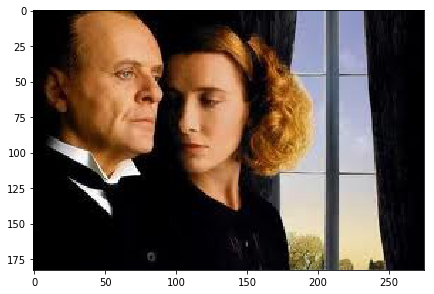

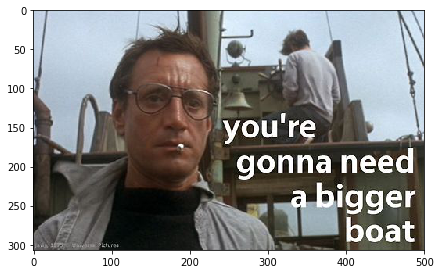

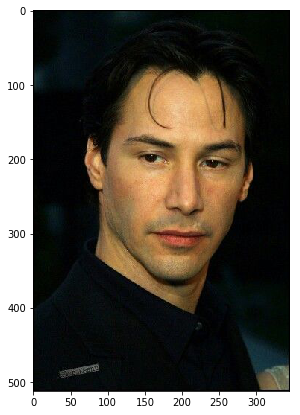

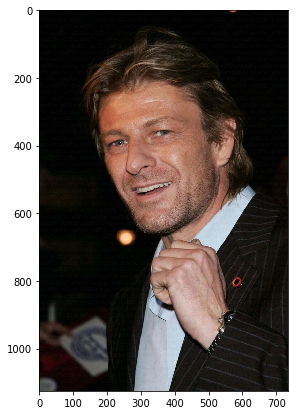

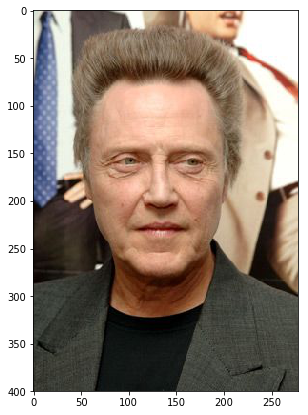

In [217]:
plt.imshow(PIL.Image.open(test3))

for x in get_near(test3, embeds_pinterest, 5):
    plt.figure(figsize=(7,7))
    plt.imshow(PIL.Image.open('data/pinterest/images/{}'.format(x[0])))
    plt.show()

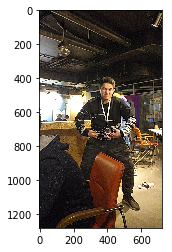

<Figure size 504x504 with 0 Axes>

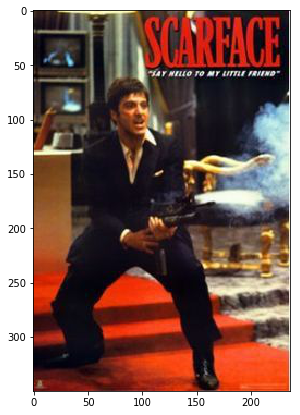

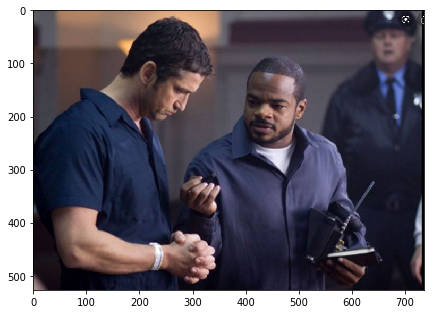

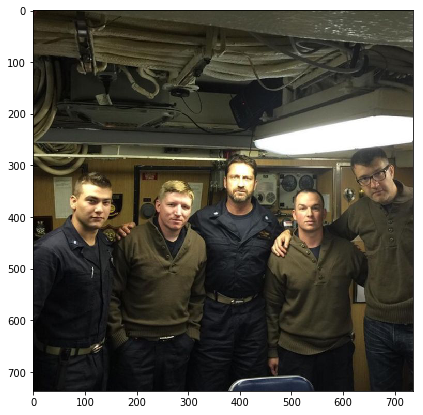

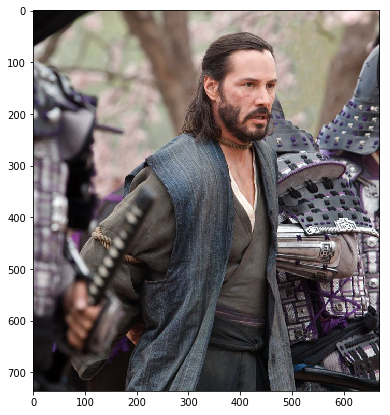

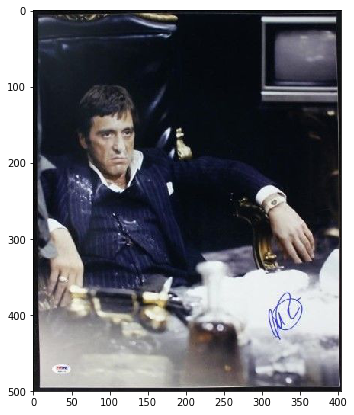

In [245]:
test = '2020-02-15 18.23.04.jpg'
plt.imshow(PIL.Image.open(test))
plt.figure(figsize=(7,7))
plt.show()

for x in get_near(test, embeds_pinterest, 5):
    plt.figure(figsize=(7,7))
    plt.imshow(PIL.Image.open('data/pinterest/images/{}'.format(x[0])))
    plt.show()

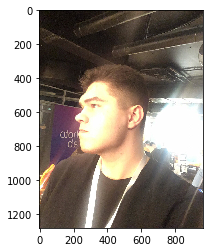

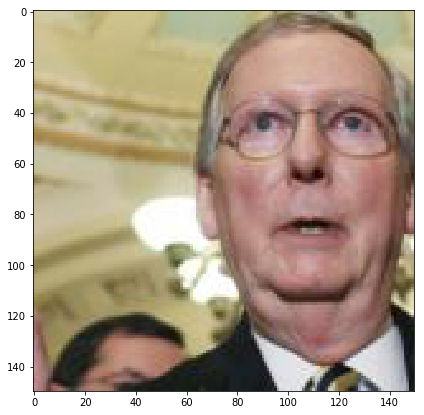

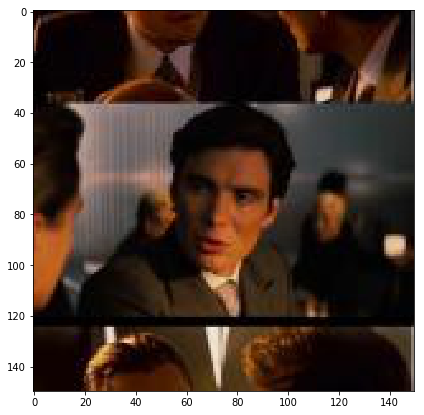

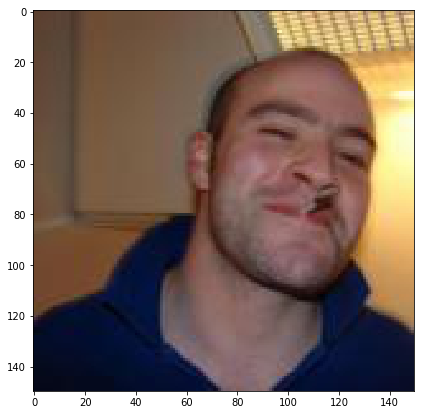

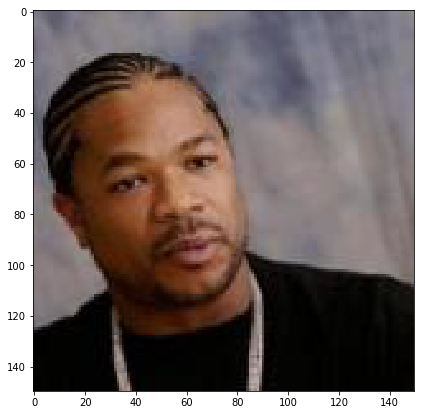

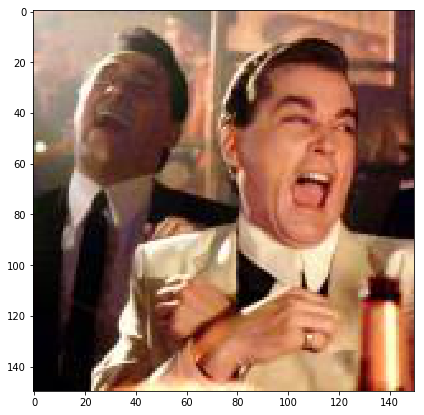

In [221]:
plt.imshow(PIL.Image.open('2020-02-15 18.17.42.jpg'))

for x in get_near(test3, embeds_memes, 5):
    plt.figure(figsize=(7,7))
    plt.imshow(PIL.Image.open('data/memes/images/{}'.format(x[0])))
    plt.show()

In [254]:
images = []
for f in os.listdir('/Users/sergmiller/Documents/my/photolab/Hinzu/search'):
    if f[:4] == '2020':
        images.append(f)

In [257]:
import slideshow

In [264]:
# s = slideshow.slideshow()

In [270]:
import cv2
import numpy as np 
import os, time


# first we define the folder that contains the images
my_folder = 'Documents/my/photolab/Hinzu/search'

# we create a blank image of the same dimension as the images inside de folder
imgfirst = np.zeros((453,604,3), np.uint8)

# we define the location of the folder
my_location = "/Users/sergmiller/" + my_folder

# we loop through the files inside the folder
for file in os.listdir(my_location):
    if file[:4] != '2020':
        continue

# we read a file    
    img = cv2.imread(my_location + '/' + file)
    
    if np.array(img).shape [-1] != 3:
        print(file, np.array(img).shape)
        continue

# blending formula from cv2 docs:
# dst = alpha*img1 + beta*img2 + gamma, where gamma = 0

# we create a loop from 1-10 (including 10) to apply alpha 
    for alpha in np.arange(1, 11):

# we divide alpha by 10 to create a float
        alpha = alpha/10.0
# to create a transition effect, beta must be:
        beta = 1 - alpha
# we load the transition into the image canvas
        cv2.imshow('album', cv2.addWeighted(img, alpha, imgfirst, beta, 0.0))
        time.sleep(0.1)
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    if cv2.waitKey(0) & 0xff == ord('q'):
        break
# we assign the img to the first one
    imgfirst = img
     
cv2.destroyAllWindows()

error: /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/arithm.cpp:659: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function arithm_op


In [570]:
import cv2



def make_video(video_name):
    height , width , layers =  [2436, 1125, 3]
    single_height = int (2436 / 2 * 0.95)
    mini_height = height - 2 * single_height

    video = cv2.VideoWriter(video_name,-1,1,(width, height))


    img_intro = '../backend/templates/iz_kakogo_ti_filma.png'
    
    
    def resize_cust(file_path, STANDART_W,STANDART_H):
        im = cv2.imread(file_path)
        H, W, _ = im.shape
        bg = np.zeros([STANDART_H, STANDART_W, 3], dtype=np.uint8)
        if H >= STANDART_H:
            k = STANDART_H/H
            im = cv2.resize(im, (int(W*k), int(STANDART_H)))
            if W*k > STANDART_W:
                k1 = STANDART_W / W
                im = cv2.resize(im, (int(W*k1), int(H*k1)))
                np_im = np.array(im, dtype=np.uint8)[:, :, :3]
                bg[int(- H*k1/2 + STANDART_H/2):int(- H*k1/2 + STANDART_H/2)+int(H*k1), int(STANDART_W / 2 - W * k1 / 2):int(W * k1) + int(STANDART_W / 2 - W * k1 / 2),:] += np_im[:, :, :]
            else:
                np_im = np.array(im, dtype=np.uint8)[:, :, :3]
                bg[0:int(STANDART_H), int(STANDART_W/2 - W*k/2):int(W*k)+int(STANDART_W/2 - W*k/2), :] += np_im[:, :, :]
        else:
            k = STANDART_W/W
            im = cv2.resize(im, (int(STANDART_W), int(H*k)))
            if H * k > STANDART_H:
                k1 = STANDART_H / H
                im = cv2.resize(im, (int(W * k1), int(H * k1)))
                np_im = np.array(im, dtype=np.uint8)[:, :, :3]
                bg[int(- H * k1 / 2 + STANDART_H / 2):int(- H * k1 / 2 + STANDART_H / 2) + int(H * k1),
                int(STANDART_W / 2 - W * k1 / 2):int(W * k1) + int(STANDART_W / 2 - W * k1 / 2), :] += np_im[:, :, :]
            else:
                np_im = np.array(im, dtype=np.uint8)[:, :, :3]
                bg[int(- H*k/2 + STANDART_H/2):int(- H*k/2 + STANDART_H/2)+int(H*k), 0: int(STANDART_W), :] += np_im[:, :, :]
        return bg

    def prepare(img):

#         img = cv2.resize(img, (width, single_height))
        img_pad = resize_cust(img, width, single_height)
        return img_pad
    
    plt.imshow(PIL.Image.open(images[0]))

    upper_img = prepare(images[0])

    for img in [img_intro] + images[1:]:
        img_prepared = np.concatenate((prepare(images[0]), np.zeros((mini_height, width, 3), dtype=upper_img.dtype)), axis=0)
        img_prepared = np.concatenate((img_prepared, prepare(img)), axis=0)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_prepared,img,(0, height // 2), font, 1.5, (128,100,162), 2, cv2.LINE_AA)
        video.write(img_prepared)

    cv2.destroyAllWindows()
    video.release()

In [571]:
print(single_height)

1157


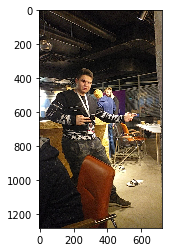

In [572]:
make_video('video21.mov')

In [574]:
a = [(2,3),3,4]
np.random.shuffle(a)

In [575]:
a

[(2, 3), 4, 3]